In [1]:
# Imports
import scipy.stats as stats
import numpy as np
import pandas as pd
from pandasai import PandasAI
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import explore as e
import prepare
import warnings
warnings.filterwarnings("ignore")
import plotly.express


In [2]:
# set train equal to the prepared dataframe
df = prepare.prepare_edu()
train, validate, test = prepare.split(df)

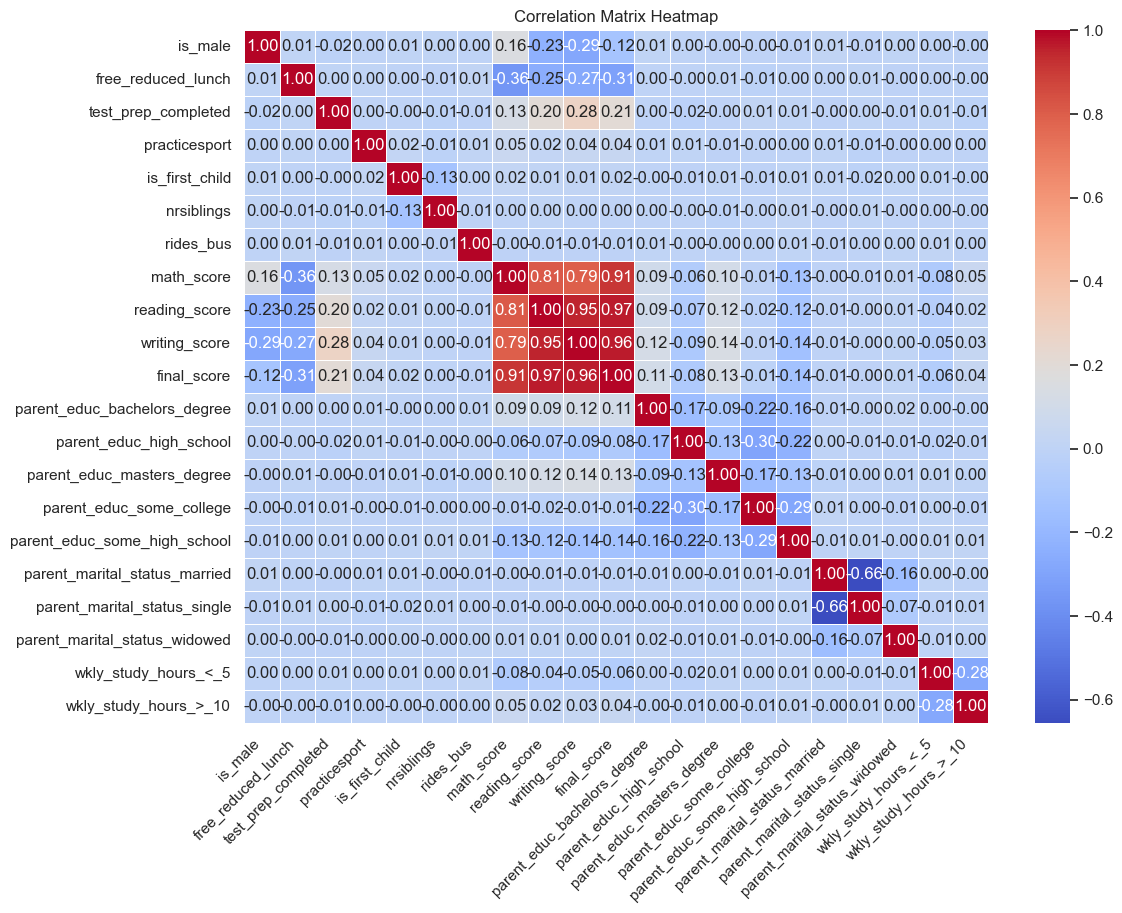

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data'
correlation_matrix = train.drop(columns = 'risk_rating').corr(method='spearman')

# Set up the size and style of the heatmap
plt.figure(figsize=(12, 9))
sns.set(style="white")

# Create the heatmap
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Customize the plot appearance
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)

# Show the heatmap
plt.show()


## There seems to be a lot of noise with our data so we are only gonna focus on our final score for this project.

In [4]:
round(df['final_score'],0).astype(int)

0        72
1        82
2        90
3        48
4        76
         ..
30636    62
30637    54
30638    66
30639    88
30640    61
Name: final_score, Length: 30632, dtype: int64

In [5]:
train.drop(columns = ['reading_score', 'math_score', 'writing_score'], inplace=True)

In [6]:
## Now i want to run a correlation chart in 

<Axes: >

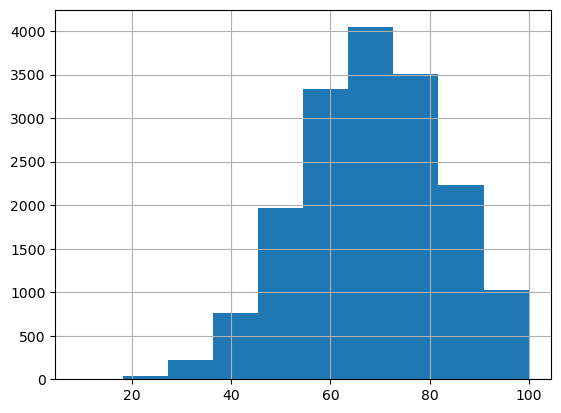

In [8]:
train.final_score.hist()

# Finding The risk categories 

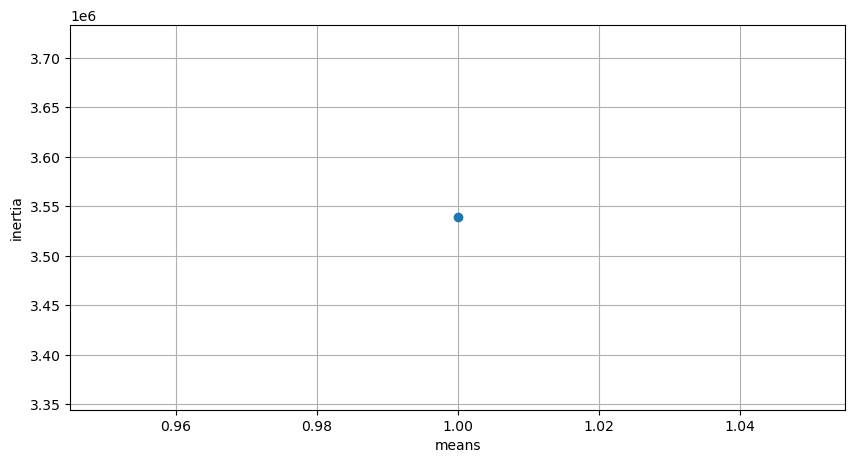

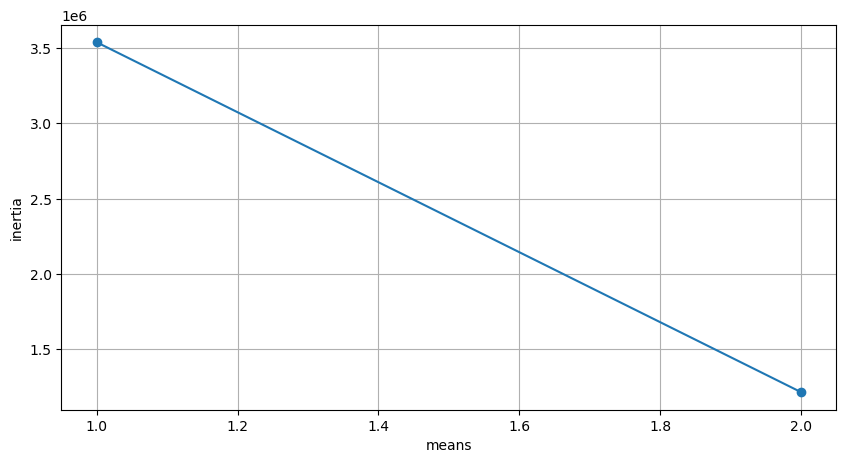

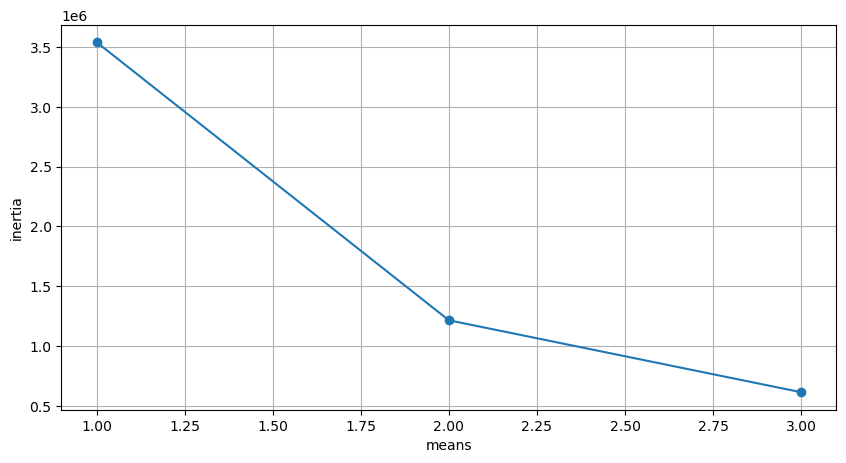

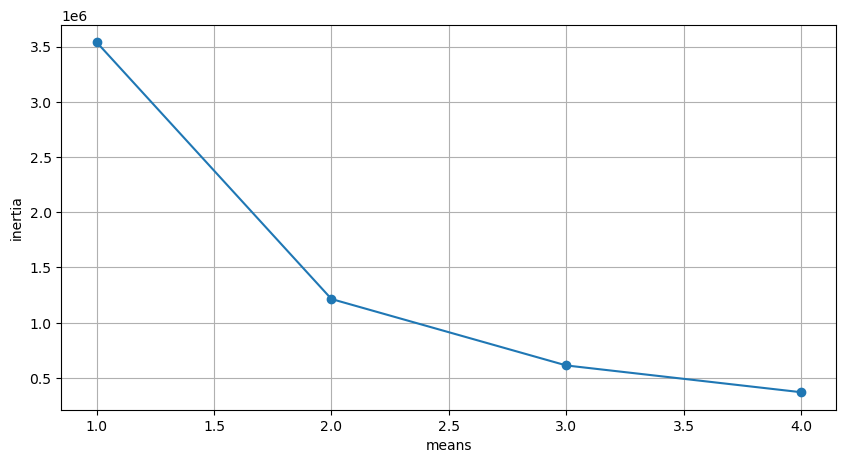

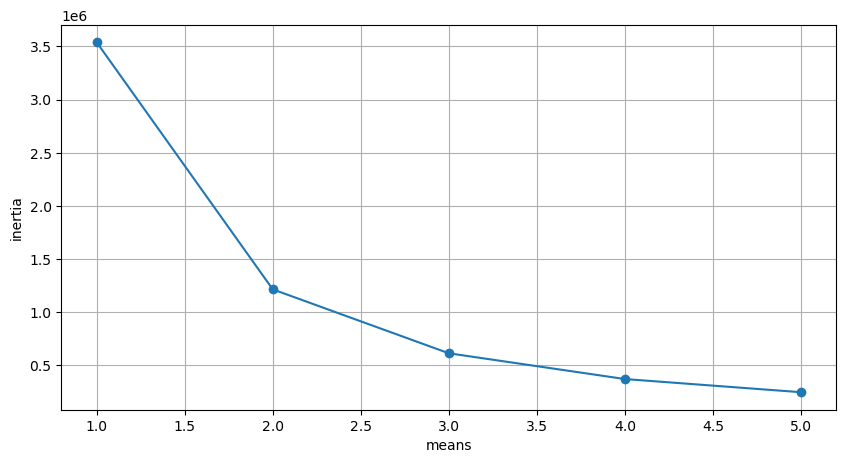

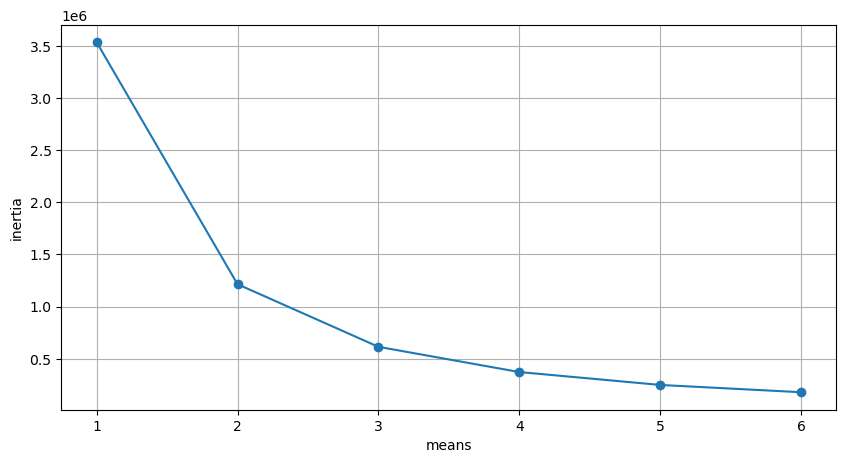

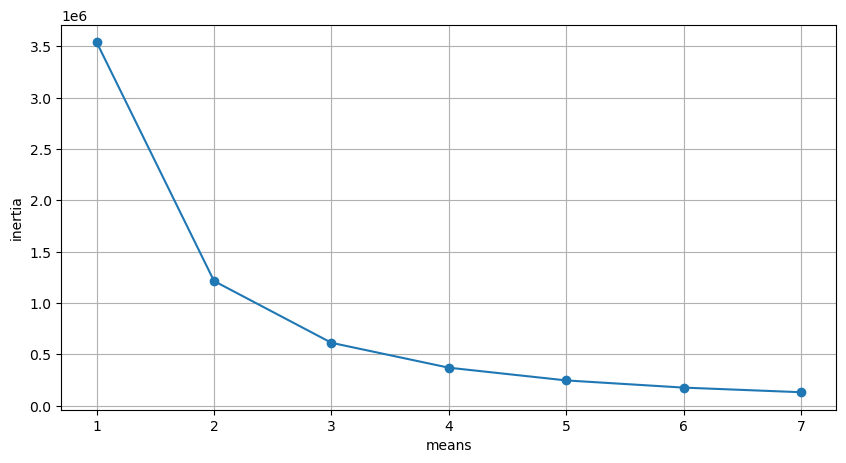

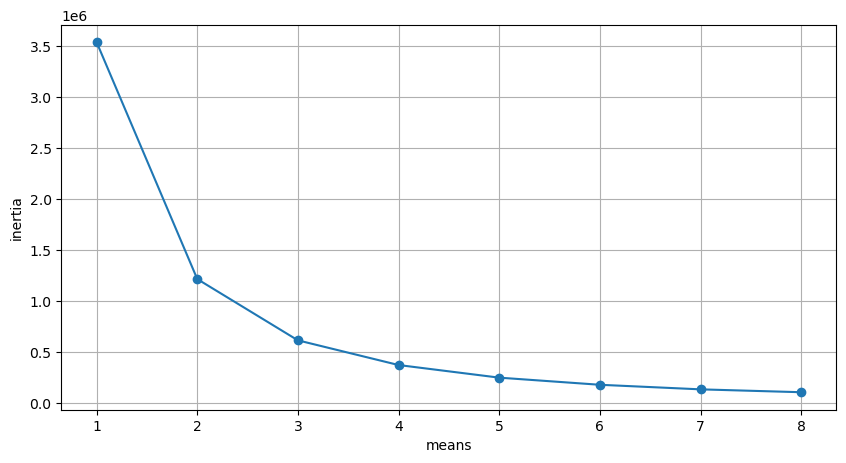

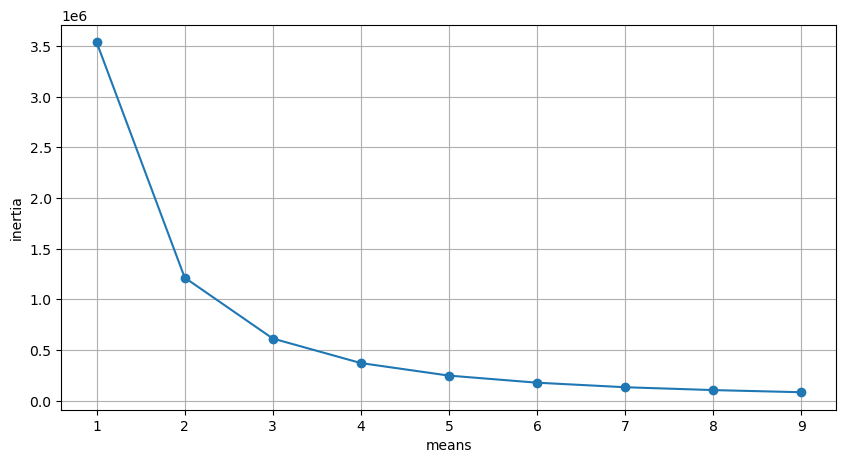

In [9]:
from sklearn.cluster import KMeans
e.best_kmeans(data=train[['final_score']],k_max=10)

In [10]:
final_grade_cluster = e.apply_kmeans(data=train[['final_score']],k=3)

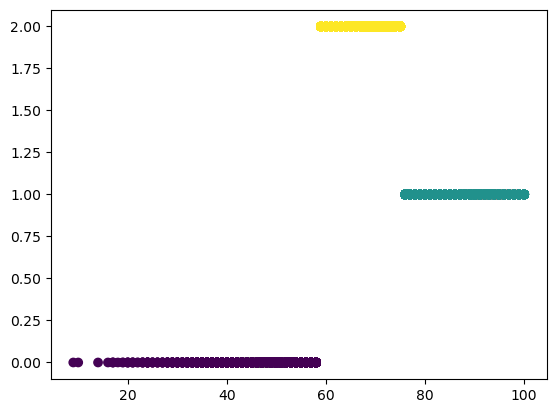

In [11]:
plt.scatter(final_grade_cluster.final_score, y=final_grade_cluster.k_means_3, c=final_grade_cluster.k_means_3)

In [12]:
len(train.final_score) == len(final_grade_cluster.k_means_3)

True

In [13]:
train['cluster_pattern'] = final_grade_cluster['k_means_3']

In [14]:
final_grade_list = ['final_score','cluster_pattern']

In [15]:
final_grade_train = train[final_grade_list]

In [16]:
cluster_zero = final_grade_train[final_grade_train['cluster_pattern']== 0]
cluster_zero.describe()

final_score  cluster_pattern
count  4323.000000           4323.0
mean     49.600972              0.0
std       7.286188              0.0
min       9.000000              0.0
25%      46.000000              0.0
50%      51.000000              0.0
75%      55.000000              0.0
max      58.000000              0.0

In [17]:
cluster_one = final_grade_train[final_grade_train['cluster_pattern']== 1]
cluster_one.describe()

final_score  cluster_pattern
count  5530.000000           5530.0
mean     84.233092              1.0
std       6.263557              0.0
min      76.000000              1.0
25%      79.000000              1.0
50%      83.000000              1.0
75%      89.000000              1.0
max     100.000000              1.0

In [18]:
cluster_two = final_grade_train[final_grade_train['cluster_pattern']== 2]
cluster_two.describe()

final_score  cluster_pattern
count  7300.000000           7300.0
mean     67.096986              2.0
std       4.780041              0.0
min      59.000000              2.0
25%      63.000000              2.0
50%      67.000000              2.0
75%      71.000000              2.0
max      75.000000              2.0

    Some key takeaways:
    - cluster zero:
        - min : 59
        - max: 75
    - cluster one:
        - min: 9 
        - max: 58 
    - cluster_two:
        - min: 76
        - max: 100 

## Now we can assign risk category to each cluster:
    for this we are breaking it down to three categories
        - at risk: This mean that this student is at risk for disproportionately impacted by educational inequalities. 
            - This is best repersented by cluster zero.
        - High risk: These are students who are at the GREATEST RISK for being disproportionately impacted by educational inequalities.
            - this is best repersented by cluster one
        - low risk: these are students who do are not disproportionately impacted by educational inequalities
            - this is best repersetned by cluster two

In [19]:
train.head()

is_male  free_reduced_lunch  test_prep_completed  practicesport  \
30178        0                   0                    1              1   
15705        1                   0                    1              1   
7163         0                   1                    0              1   
4147         0                   0                    1              1   
25763        0                   1                    0              1   

       is_first_child  nrsiblings  rides_bus  final_score  \
30178               0         3.0          0           81   
15705               0         2.0          0           48   
7163                1         4.0          1           52   
4147                1         3.0          0           69   
25763               1         3.0          1           45   

       parent_educ_bachelor's_degree  parent_educ_high_school  \
30178                              0                        0   
15705                              0                        1   
7163                               0                        0   
4147                               0                        0   
25763                              0                        0   

       parent_educ_master's_degree  parent_educ_some_college  \
30178                            0                         1   
15705                            0                         0   
7163                             0                         1   
4147                             1                         0   
25763                            1                         0   

       parent_educ_some_high_school  parent_marital_status_married  \
30178                             0                              1   
15705                             0                              1   
7163                              0                              0   
4147                              0                              1   
25763                             0                              1   

       parent_marital_status_single  parent_marital_status_widowed  \
30178                             0                              0   
15705                             0                              0   
7163                              1                              0   
4147                              0                              0   
25763                             0                              0   

       wkly_study_hours_<_5  wkly_study_hours_>_10 risk_rating  \
30178                     0                      0    low_risk   
15705                     0                      0   high_risk   
7163                      1                      0   high_risk   
4147                      1                      0     at_risk   
25763                     0                      0   high_risk   

       cluster_pattern  
30178                1  
15705                0  
7163                 0  
4147                 2  
25763                0

# Now lets explore feature and see if we can find any patterns 

array([[<Axes: title={'center': 'is_male'}>,
        <Axes: title={'center': 'free_reduced_lunch'}>,
        <Axes: title={'center': 'test_prep_completed'}>],
       [<Axes: title={'center': 'practicesport'}>,
        <Axes: title={'center': 'is_first_child'}>,
        <Axes: title={'center': 'nrsiblings'}>],
       [<Axes: title={'center': 'rides_bus'}>,
        <Axes: title={'center': 'final_score'}>, <Axes: >]], dtype=object)

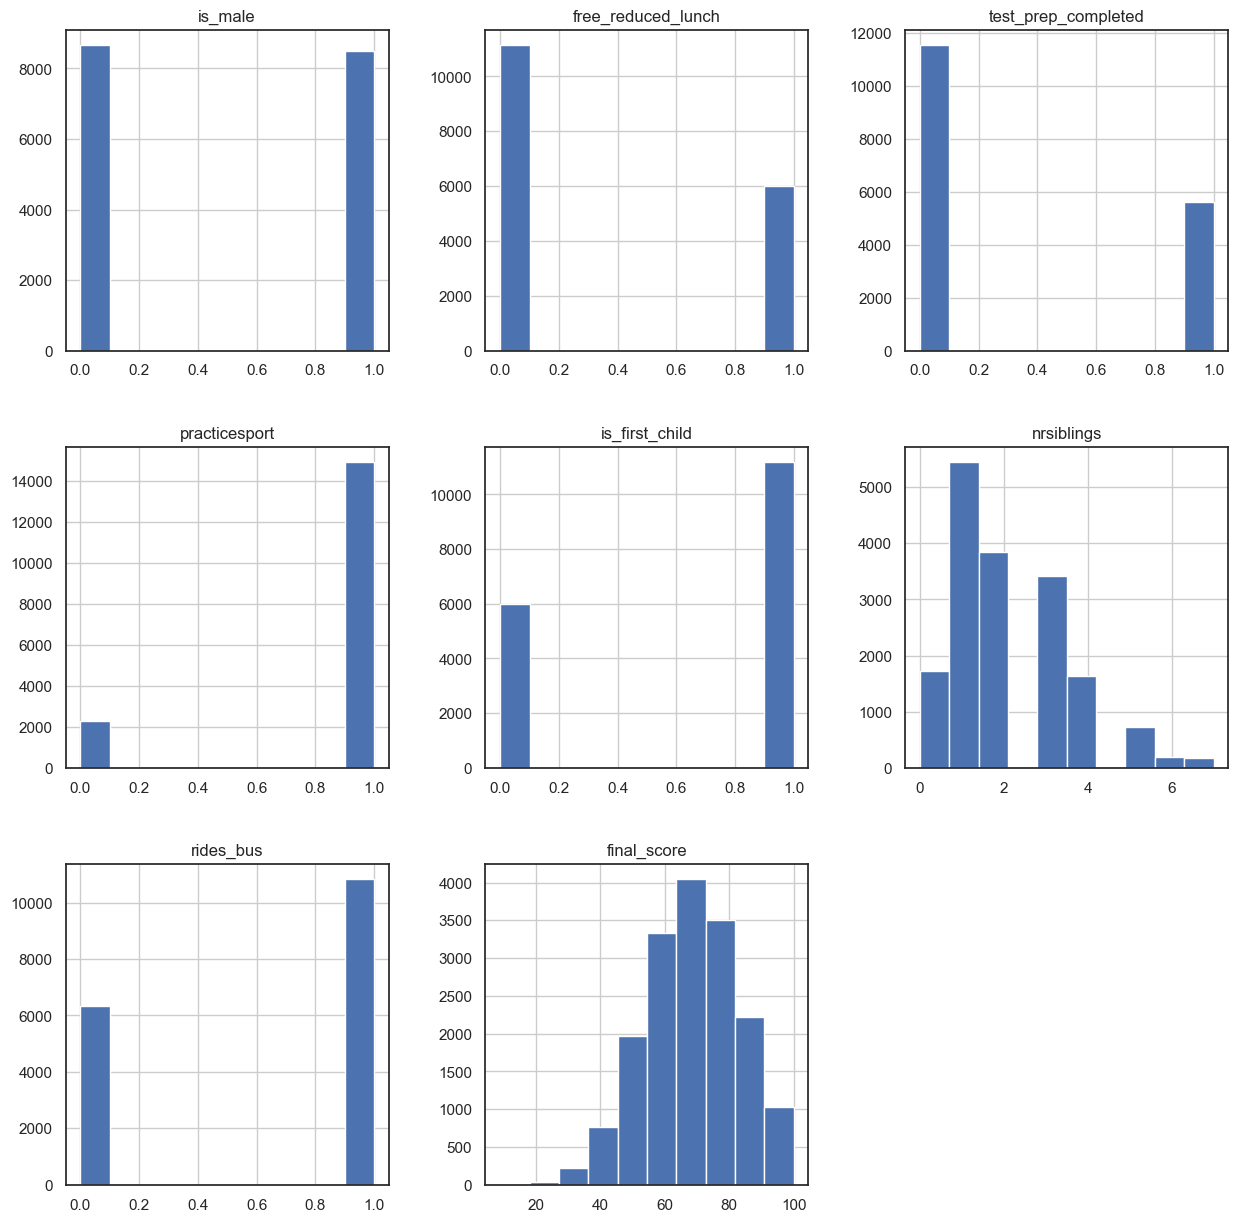

In [7]:
train.hist(figsize=(15,15))

## Parents Education 

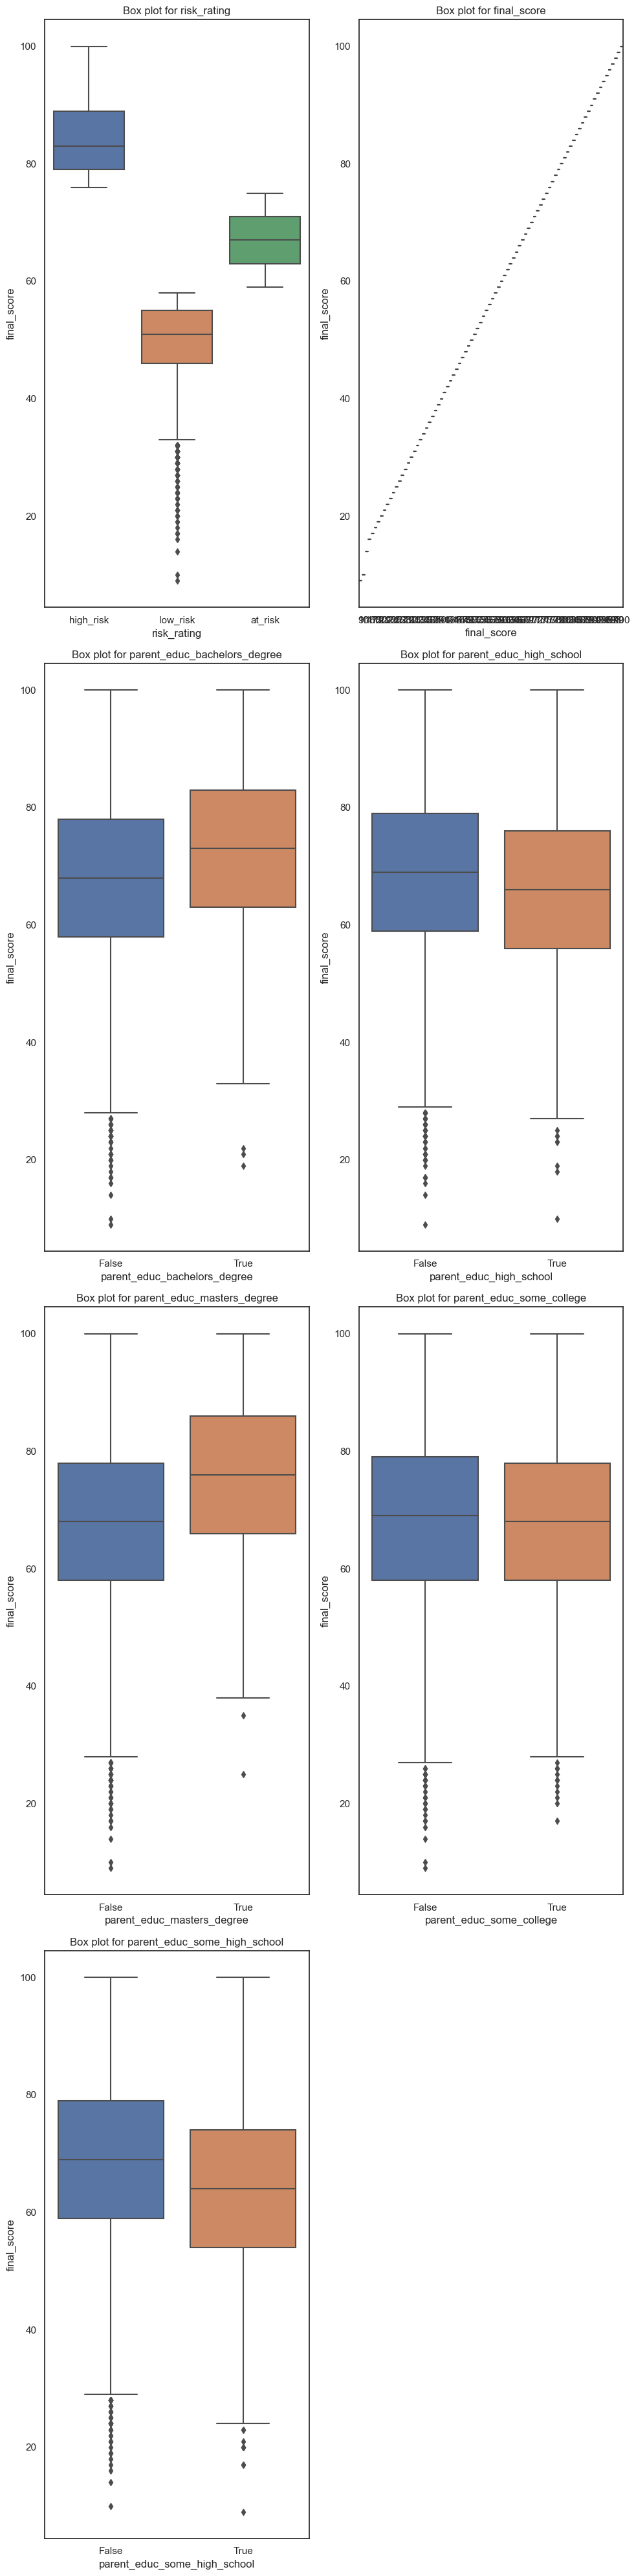

In [8]:
parents_edu = list()
parents_edu.append('risk_rating')
parents_edu.append('final_score')

for cols in train.columns:
    if 'parent_educ' in cols:
        parents_edu.append(cols)
    else:
        pass

# Calculate the number of rows and columns for the subplots grid
num_plots = len(parents_edu)
cols = 2
rows = num_plots // cols if num_plots % cols == 0 else (num_plots // cols) + 1

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(10, 10 * rows))

for idx, edu in enumerate(parents_edu):
    row, col = idx // cols, idx % cols
    ax = axes[row, col]
    sns.boxplot(data=train, x=f'{edu}', y="final_score", ax=ax)
    ax.set_title(f'Box plot for {edu}')
    ax.set_xlabel(f'{edu}')
    ax.set_ylabel('final_score')

# Adjust layout and remove any unused subplots
fig.tight_layout()
for r in range(rows):
    for c in range(cols):
        if r * cols + c >= num_plots:
            axes[r, c].remove()

plt.show()


In [10]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

parent_educ_columns = [
    "parent_educ_bachelors_degree",
    'parent_educ_high_school',
    "parent_educ_masters_degree",
    'parent_educ_some_college',
    'parent_educ_some_high_school'
]

# Group the final scores based on parental education levels
groups = [df[df[col] == 1]['final_score'] for col in parent_educ_columns]

# Set the alpha value
alpha = 0.05

# Check for normality using Shapiro-Wilk test
shapiro_p_values = [stats.shapiro(group)[1] for group in groups]

for i, p_value in enumerate(shapiro_p_values):
    print(f"Shapiro-Wilk test p-value for {parent_educ_columns[i]} group: {p_value}")

# Check for homogeneity of variances using Levene's test
_, p_value_levene = stats.levene(*groups)
print("Levene's test p-value:", p_value_levene)

# If normality and homogeneity of variances assumptions are met, perform one-way ANOVA
if all(p > alpha for p in shapiro_p_values) and p_value_levene > alpha:
    F_statistic, p_value_anova = stats.f_oneway(*groups)
    print("One-way ANOVA test statistic:", F_statistic)
    print("One-way ANOVA test p-value:", p_value_anova)
    
    if p_value_anova < alpha:
        print("There is a statistically significant difference in final scores among the different parental education groups.")
    else:
        print("There is no statistically significant difference in final scores among the different parental education groups.")
else:
    print("The assumptions of normality and/or homogeneity of variances are not met. Consider using a non-parametric alternative, like the Kruskal-Wallis test.")


Shapiro-Wilk test p-value for parent_educ_bachelors_degree group: 6.698262007987649e-15
Shapiro-Wilk test p-value for parent_educ_high_school group: 6.910096800316623e-11
Shapiro-Wilk test p-value for parent_educ_masters_degree group: 1.6208725916902304e-14
Shapiro-Wilk test p-value for parent_educ_some_college group: 2.9846016533505574e-17
Shapiro-Wilk test p-value for parent_educ_some_high_school group: 5.151509219203376e-10
Levene's test p-value: 0.6333934076269857
The assumptions of normality and/or homogeneity of variances are not met. Consider using a non-parametric alternative, like the Kruskal-Wallis test.


In [11]:
import pandas as pd
import scipy.stats as stats


parent_educ_columns = [
    "parent_educ_bachelors_degree",
    'parent_educ_high_school',
    "parent_educ_masters_degree",
    'parent_educ_some_college',
    'parent_educ_some_high_school'
]

# Group the final scores based on parental education levels
groups = [df[df[col] == 1]['final_score'] for col in parent_educ_columns]

# Perform the Kruskal-Wallis test
H_statistic, p_value_kruskal = stats.kruskal(*groups)

print("Kruskal-Wallis test statistic:", H_statistic)
print("Kruskal-Wallis test p-value:", p_value_kruskal)

# Set the alpha value
alpha = 0.05

# Interpret the results based on the chosen alpha value
if p_value_kruskal < alpha:
    print("There is a statistically significant difference in final scores among the different parental education groups.")
else:
    print("There is no statistically significant difference in final scores among the different parental education groups.")


Kruskal-Wallis test statistic: 1264.7147206212114
Kruskal-Wallis test p-value: 1.4870879280114854e-272
There is a statistically significant difference in final scores among the different parental education groups.


1. We first attempted to perform a one-way ANOVA test to investigate the relationship between different parental education groups and final scores. Before doing this, we needed to check the assumptions of normality and homogeneity of variances.

2. We checked the normality assumption using the Shapiro-Wilk test and found that the p-values for all groups were below the chosen alpha value (0.05), indicating that the normality assumption was not met for any of the groups.

3. We checked the homogeneity of variances assumption using Levene's test and found that the p-value was above the chosen alpha value (0.05), indicating that the homogeneity of variances assumption was met.

4. Since the normality assumption was not met, we decided to use a non-parametric alternative, the Kruskal-Wallis test, to investigate the relationship between different parental education groups and final scores.

5. We performed the Kruskal-Wallis test and interpreted the results based on the chosen alpha value. If the p-value was smaller than alpha, we concluded that there was a significant difference in final scores among the different parental education groups; otherwise, we concluded that there was no significant difference.


## Test Prep completed

<Axes: xlabel='test_prep_completed', ylabel='final_score'>

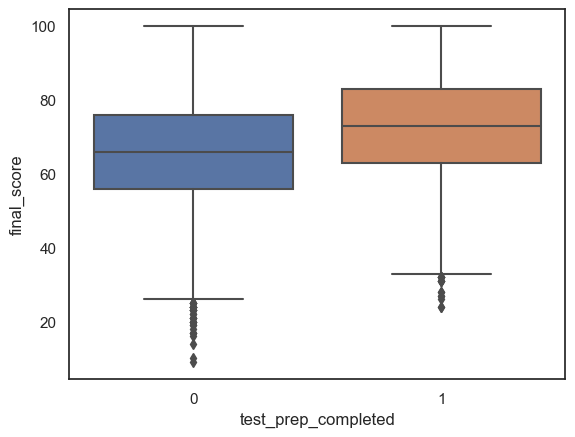

In [12]:
sns.boxplot(train, x='test_prep_completed', y='final_score')

In [13]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'test_prep_completed' and 'final_score'
test_prep_completed = df[df['test_prep_completed'] == 1]['final_score']
test_prep_not_completed = df[df['test_prep_completed'] == 0]['final_score']

# Set the alpha value
alpha = 0.05

# Check for normality using Shapiro-Wilk test
_, p_value_completed = stats.shapiro(test_prep_completed)
_, p_value_not_completed = stats.shapiro(test_prep_not_completed)

print("Shapiro-Wilk test p-value for test_prep_completed group:", p_value_completed)
print("Shapiro-Wilk test p-value for test_prep_not_completed group:", p_value_not_completed)

# Check for homogeneity of variances using Levene's test
_, p_value_levene = stats.levene(test_prep_completed, test_prep_not_completed)
print("Levene's test p-value:", p_value_levene)

# If normality and homogeneity of variances assumptions are met, perform two-sample t-test
if p_value_completed > alpha and p_value_not_completed > alpha and p_value_levene > alpha:
    t_statistic, p_value_ttest = stats.ttest_ind(test_prep_completed, test_prep_not_completed)
    print("Two-sample t-test statistic:", t_statistic)
    print("Two-sample t-test p-value:", p_value_ttest)
    
    if p_value_ttest < alpha:
        print("There is a statistically significant difference in final scores between students who completed the test preparation course and those who didn't.")
    else:
        print("There is no statistically significant difference in final scores between students who completed the test preparation course and those who didn't.")
else:
    print("The assumptions of normality and/or homogeneity of variances are not met. Consider using a non-parametric alternative, like the Mann-Whitney U test.")

    # Perform Mann-Whitney U test
    U_statistic, p_value_mannwhitney = stats.mannwhitneyu(test_prep_completed, test_prep_not_completed)
    print("Mann-Whitney U test statistic:", U_statistic)
    print("Mann-Whitney U test p-value:", p_value_mannwhitney)

    if p_value_mannwhitney < alpha:
        print("There is a statistically significant difference in final scores between students who completed the test preparation course and those who didn't.")
    else:
        print("There is no statistically significant difference in final scores between students who completed the test preparation course and those who didn't.")


Shapiro-Wilk test p-value for test_prep_completed group: 4.4401741711096273e-26
Shapiro-Wilk test p-value for test_prep_not_completed group: 3.770899094071639e-24
Levene's test p-value: 0.031753178655454545
The assumptions of normality and/or homogeneity of variances are not met. Consider using a non-parametric alternative, like the Mann-Whitney U test.
Mann-Whitney U test statistic: 130014250.0
Mann-Whitney U test p-value: 2.6328136283629486e-306
There is a statistically significant difference in final scores between students who completed the test preparation course and those who didn't.


# Number of siblings

**H$_0$:** There is no correlation between number of siblings and final grade. 

**H$_a$:** There is a correlation between number of siblings and final grade.

## Checkig the density of groups by number of siblings and final score 

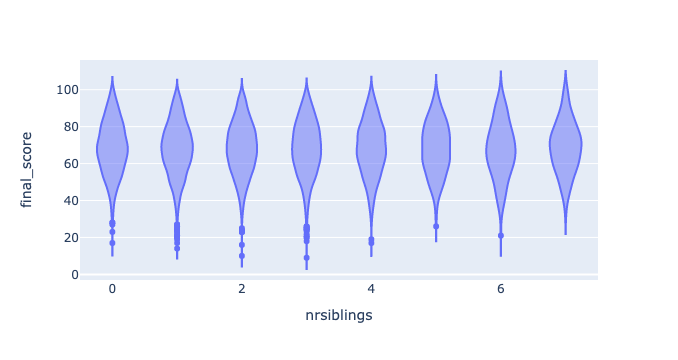

In [14]:
plotly.express.violin(data_frame=train, x='nrsiblings', y='final_score')

## visualize by boxplot 

<Axes: xlabel='nrsiblings', ylabel='final_score'>

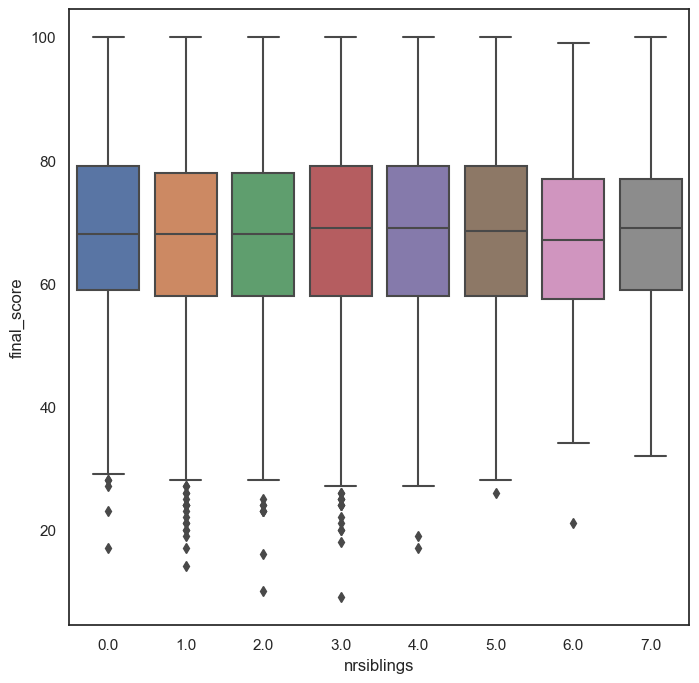

In [15]:
plt.figure(figsize=(8,8))
sns.boxplot(data=train, x="nrsiblings", y="final_score")

## Check our hypthesis

In [16]:
# Assuming you have a DataFrame named 'data' with columns 'nrsiblings' and 'final_score'
nrsiblings = df['nrsiblings']
final_score = df['final_score']

# Set the alpha value
alpha = 0.05

# Perform the Spearman's rank correlation test
rho, p_value = stats.spearmanr(nrsiblings, final_score)

print("Spearman's rank correlation coefficient (rho):", rho)
print("Spearman's rank correlation test p-value:", p_value)

# Interpret the results based on the chosen alpha value
if p_value < alpha:
    print("There is a statistically significant relationship between the number of siblings and the final score.")
else:
    print("There is no statistically significant relationship between the number of siblings and the final score.")


Spearman's rank correlation coefficient (rho): -0.0006964002165787303
Spearman's rank correlation test p-value: 0.9029948423850772
There is no statistically significant relationship between the number of siblings and the final score.


# Free and Reduced Lunch

## Here are my hypothesis.
    H$_0$: Free or reduced lunch has no affect on final score.
    H$_0$: Free or reduced lunch has some  affect on final score.


In [32]:
free_reduce_df = train[train['free_reduced_lunch'] == 1]

In [33]:
standard_lunch = train[train['free_reduced_lunch'] == 0]

In [34]:
free_reduce_df.risk_rating.value_counts()

at_risk      2669
high_risk    2278
low_risk     1060
Name: risk_rating, dtype: int64

In [35]:
free_reduce_df['final_score'].mean()

62.02513733977027

In [36]:
standard_lunch['final_score'].mean()

71.54647407141576

In [37]:
standard_lunch.risk_rating.value_counts()

at_risk      4976
low_risk     4470
high_risk    1700
Name: risk_rating, dtype: int64

<Axes: >

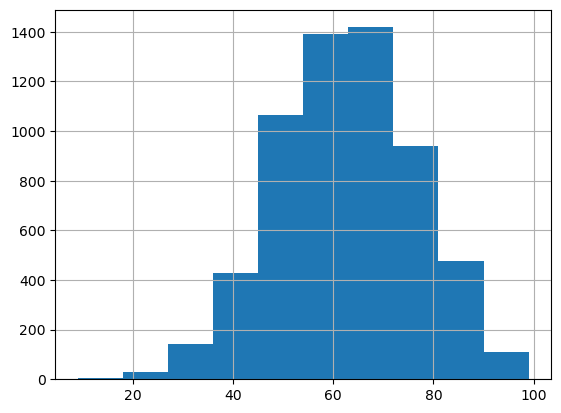

In [38]:
free_reduce_df['final_score'].hist()

<Axes: >

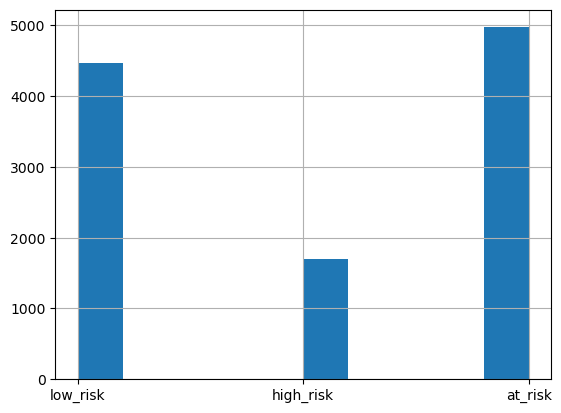

In [39]:
standard_lunch['risk_rating'].hist()

Shapiro-Wilk test p-value for free/reduced lunch students: 8.851850363811309e-10
Shapiro-Wilk test p-value for standard lunch students: 1.2070278669252559e-23


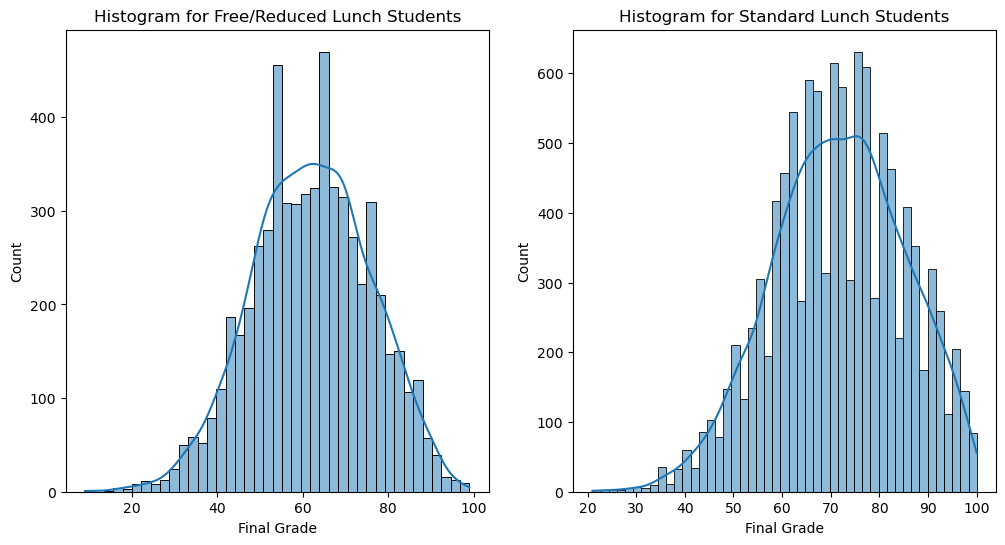

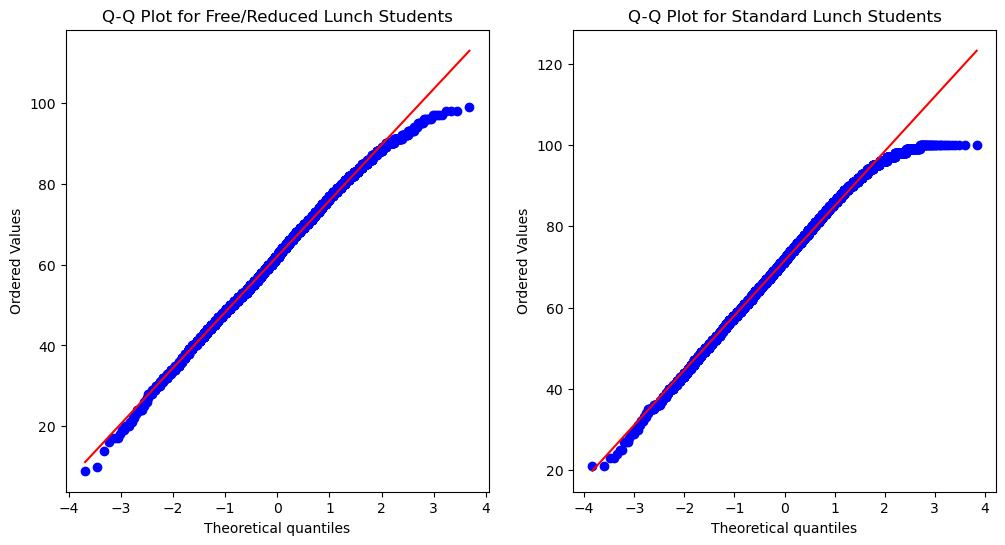

Levene's test p-value: 0.09633852496726257


In [44]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


free_reduced_students = train[train['free_reduced_lunch'] == 1]['final_score']
standard_students = train[train['free_reduced_lunch'] == 0]['final_score']

# Check for independence (assuming you have a valid dataset with independent groups)

# Check for normality using Shapiro-Wilk test
_, p_value_free_reduced = stats.shapiro(free_reduced_students)
_, p_value_standard = stats.shapiro(standard_students)

print("Shapiro-Wilk test p-value for free/reduced lunch students:", p_value_free_reduced)
print("Shapiro-Wilk test p-value for standard lunch students:", p_value_standard)

# Check for normality visually using histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(free_reduced_students, kde=True)
plt.title("Histogram for Free/Reduced Lunch Students")
plt.xlabel("Final Grade")

plt.subplot(1, 2, 2)
sns.histplot(standard_students, kde=True)
plt.title("Histogram for Standard Lunch Students")
plt.xlabel("Final Grade")
plt.show()

# Check for normality visually using Q-Q plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(free_reduced_students, plot=plt)
plt.title("Q-Q Plot for Free/Reduced Lunch Students")

plt.subplot(1, 2, 2)
stats.probplot(standard_students, plot=plt)
plt.title("Q-Q Plot for Standard Lunch Students")
plt.show()

# Check for homogeneity of variances using Levene's test
_, p_value_levene = stats.levene(free_reduced_students, standard_students)
print("Levene's test p-value:", p_value_levene)

In [46]:
import pandas as pd


# Assuming you have a DataFrame named 'data' with columns 'is_free_reduced_lunch' and 'final_score'
free_reduced_students = df[df['free_reduced_lunch'] == 1]['final_score']
standard_students = df[df['free_reduced_lunch'] == 0]['final_score']

# Perform the Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(free_reduced_students, standard_students, alternative='two-sided')

print("Mann-Whitney U test statistic:", u_statistic)
print("Mann-Whitney U test p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')


Mann-Whitney U test statistic: 66887488.0
Mann-Whitney U test p-value: 0.0


In [ ]:
import pandas as pd
from scipy import stats

def mann_whitney_u_test(df,free_reduced_lunch_column='free_reduced_lunch', final_score_column= 'final_score', alpha=0.05):
    """
    Perform the Mann-Whitney U test on final scores grouped by the free_reduced_lunch column.

    :param df: DataFrame containing the data.
    :param free_reduced_lunch_column: The column name indicating if a student has free or reduced lunch.
    :param final_score_column: The column name containing the final scores.
    :param alpha: The significance level for the test. Default is 0.05.
    :return: A string describing the result of the Mann-Whitney U test.
    """
    # Group final scores based on the free_reduced_lunch column
    free_reduced_students = df[df[free_reduced_lunch_column] == 1][final_score_column]
    standard_students = df[df[free_reduced_lunch_column] == 0][final_score_column]

    # Perform the Mann-Whitney U test
    u_statistic, p_value = stats.mannwhitneyu(free_reduced_students, standard_students, alternative='two-sided')

    print("Mann-Whitney U test statistic:", u_statistic)
    print("Mann-Whitney U test p-value:", p_value)

    # Interpret the results based on the chosen alpha value
    if p_value < alpha:
        return "Reject the null hypothesis"
    else:
        return "Fail to reject the null hypothesis"

# Example usage
free_reduced_lunch_column = "free_reduced_lunch"
final_score_column = "final_score"



### Data Analysis: Comparing Final Scores Between Free/Reduced Lunch Students and Standard Lunch Students

#### Assign Significance Level (Alpha)
alpha = 0.05

#### Assumption Checks

##### Shapiro-Wilk Test for Normality
- Free/reduced lunch students: p-value = 8.85e-10
- Standard lunch students: p-value = 1.21e-23

Both p-values are smaller than the chosen alpha (0.05), indicating that the final scores for both groups are not normally distributed. The normality assumption is violated.

##### Levene's Test for Homogeneity of Variances
- p-value = 0.0963

The p-value is greater than the chosen alpha (0.05), indicating that we cannot conclude there is a significant difference in variances between the two groups. The assumption of equal variances seems reasonable.

#### Appropriate Hypothesis Test: Mann-Whitney U Test

Mann-Whitney U test statistic: 66,887,488
Mann-Whitney U test p-value: 0.0

The p-value is smaller than the chosen alpha (0.05), which means you can reject the null hypothesis. The results suggest that there is a significant difference in final scores between the two groups of students (free/reduced lunch students and standard lunch students).

### Conclusion

Due to the violation of the normality assumption, we used the Mann-Whitney U test to compare the final scores between the two groups. The results indicate that there is a significant difference in final scores between free/reduced lunch students and standard lunch students. Further analysis (e.g., comparing the median scores of the two groups) can help understand the nature of this difference.


# Summary of Findings

## Free/Reduced Lunch vs. Standard Lunch
- Shapiro-Wilk test indicated that both groups are not normally distributed.
- Levene's test indicated that the groups have equal variances.
- Due to the violation of the normality assumption, we used the Mann-Whitney U test.
- Mann-Whitney U test showed a statistically significant difference in final scores between students with free/reduced lunch and standard lunch.

## Parental Education Levels
- Shapiro-Wilk test indicated that all parental education level groups are not normally distributed.
- Levene's test indicated that the groups have equal variances.
- Due to the violation of the normality assumption, we used the Kruskal-Wallis test.
- Kruskal-Wallis test showed a statistically significant difference in final scores among different parental education levels.

## Test Preparation Course Completion
- Shapiro-Wilk test indicated that both groups (test preparation course completed and not completed) are not normally distributed.
- Levene's test indicated that the groups have equal variances.
- Due to the violation of the normality assumption, we used the Mann-Whitney U test.
- Mann-Whitney U test showed a statistically significant difference in final scores between students who completed the test preparation course and those who didn't.


# columns im going to model on:
    - free/reduce 
    - test prepare
    - parents education 
#### While this is only three parents education is more than just one column

### Lets split it into Xtrain and y train and do the dame with validate and train

In [17]:
x_columns = []

for cols in df.columns:
    if 'parent_edu' in cols:
        x_columns.append(cols)
    else:
        pass

x_columns.append('final_score')
x_columns.append('risk_rating')
        

In [18]:
x_columns.append('free_reduced_lunch')
x_columns.append('test_prep_completed')

In [19]:
df = df[x_columns]

In [20]:
def modeling_split(train,validate,test):
    modeling = ['parent_educ_bachelors_degree', 'parent_educ_high_school',
           'parent_educ_masters_degree', 'parent_educ_some_college',
           'parent_educ_some_high_school', 'final_score', 'risk_rating',
           'free_reduced_lunch', 'test_prep_completed']

    train = train[modeling]
    validate = validate[modeling]
    test = test[modeling]
    X_train = train.drop(columns= ['final_score', 'risk_rating'])
    y_train = train[['final_score', 'risk_rating']]

    X_validate = validate.drop(columns= ['final_score', 'risk_rating'])
    y_validate = validate[['final_score', 'risk_rating']]


    X_test = test.drop(columns= ['final_score', 'risk_rating'])
    y_test = test[['final_score', 'risk_rating']]

    return X_train, y_train, X_validate, y_validate, X_test, y_test



In [21]:
X_train, y_train, X_validate, y_validate, X_test, y_test = modeling_split(train,validate,test)

In [22]:
X_train

parent_educ_bachelors_degree  parent_educ_high_school   
30178                         False                    False  \
15705                         False                     True   
7163                          False                    False   
4147                          False                    False   
25763                         False                    False   
...                             ...                      ...   
17210                         False                    False   
16733                         False                    False   
26266                         False                    False   
13470                         False                    False   
16834                         False                    False   

       parent_educ_masters_degree  parent_educ_some_college   
30178                       False                      True  \
15705                       False                     False   
7163                        False                      True   
4147                         True                     False   
25763                        True                     False   
...                           ...                       ...   
17210                       False                     False   
16733                        True                     False   
26266                       False                      True   
13470                       False                     False   
16834                       False                     False   

       parent_educ_some_high_school  free_reduced_lunch  test_prep_completed  
30178                         False                   0                    1  
15705                         False                   0                    1  
7163                          False                   1                    0  
4147                          False                   0                    1  
25763                         False                   1                    0  
...                             ...                 ...                  ...  
17210                         False                   1                    0  
16733                         False                   1                    1  
26266                         False                   0                    1  
13470                         False                   0                    0  
16834                          True                   1                    0  

[17153 rows x 7 columns]

In [29]:
for cols in df.columns:
    if df[cols].dtype == bool:
        df[cols] = df[cols].astype(int)
    else:
        pass

In [31]:
df.columns

Index(['parent_educ_bachelors_degree', 'parent_educ_high_school',
       'parent_educ_masters_degree', 'parent_educ_some_college',
       'parent_educ_some_high_school', 'final_score', 'risk_rating',
       'free_reduced_lunch', 'test_prep_completed'],
      dtype='object')